In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('FOOD-DATA-GROUP1.csv')
data2 = pd.read_csv('FOOD-DATA-GROUP2.csv')
data3 = pd.read_csv('FOOD-DATA-GROUP3.csv')
data4 = pd.read_csv('FOOD-DATA-GROUP4.csv')
data5 = pd.read_csv('FOOD-DATA-GROUP5.csv')
data1.shape, data2.shape, data3.shape, data4.shape, data5.shape

FileNotFoundError: [Errno 2] No such file or directory: 'FOOD-DATA-GROUP1.csv'

In [ ]:
df = pd.concat([data1, data2, data3, data4, data5], ignore_index=True)
df

In [11]:
list(df.columns)

['Unnamed: 0.1',
 'Unnamed: 0',
 'food',
 'Caloric Value',
 'Fat',
 'Saturated Fats',
 'Monounsaturated Fats',
 'Polyunsaturated Fats',
 'Carbohydrates',
 'Sugars',
 'Protein',
 'Dietary Fiber',
 'Cholesterol',
 'Sodium',
 'Water',
 'Vitamin A',
 'Vitamin B1',
 'Vitamin B11',
 'Vitamin B12',
 'Vitamin B2',
 'Vitamin B3',
 'Vitamin B5',
 'Vitamin B6',
 'Vitamin C',
 'Vitamin D',
 'Vitamin E',
 'Vitamin K',
 'Calcium',
 'Copper',
 'Iron',
 'Magnesium',
 'Manganese',
 'Phosphorus',
 'Potassium',
 'Selenium',
 'Zinc',
 'Nutrition Density']

In [12]:
# 8 features of data frame
X = df[['Fat', 'Saturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium']]
X

,Fat,Saturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,Sodium
0,5.000,2.900,0.8,0.500,0.900,0.000,14.6,0.016
1,19.400,10.900,3.1,2.700,7.800,0.000,62.9,0.300
2,3.600,2.300,0.9,3.400,0.800,0.100,0.0,0.000
3,2.000,1.300,1.5,0.091,1.500,0.000,9.8,0.017
4,2.300,1.400,1.2,0.900,1.200,0.000,8.1,0.046
...,...,...,...,...,...,...,...,...
2390,0.095,0.000,6.7,0.000,0.500,0.000,0.0,0.027
2391,0.099,0.027,0.2,0.034,0.062,0.089,0.0,0.084
2392,0.070,0.056,0.7,0.096,0.400,0.400,0.0,0.080
2393,0.300,0.036,3.3,2.200,1.800,1.100,0.0,0.014


In [13]:
# standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

NameError: name 'StandardScaler' is not defined

In [9]:
# find best number of clusters using elbow plot
range_n_clusters = range(1, 11)
sum_squared_dist = []

for n in range_n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    sum_squared_dist.append(kmeans.inertia_)

location = KneeLocator(range_n_clusters, sum_squared_dist, S=1.0, curve="convex", direction="decreasing")
    
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, sum_squared_dist, marker='o')
plt.axvline(location.elbow, color="red", linestyle="--")
plt.title('Find number of clusters using elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Distances')
plt.show()

NameError: name 'KMeans' is not defined

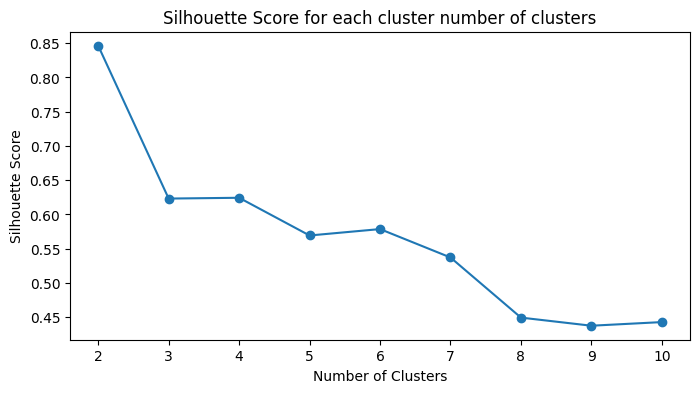

In [8]:
# calculate silhouette scores for different number of clusters
silhouette_scores = []

for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for each cluster number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [9]:
# use n = 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df_clean = df[['food', 'Fat', 'Saturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Cluster']]

count = df_clean['Cluster'].value_counts()
count

Cluster
0    2159
2     215
1      21
Name: count, dtype: int64

In [10]:
# check which food items are in which clusters
items = df_clean[df_clean['Cluster'] == 2]
items

,food,Fat,Saturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,Sodium,Cluster
17,gjetost cheese,67.0,43.5,96.8,0.0,21.9,0.0,213.4,1.400,2
66,kung pao chicken,42.2,8.2,41.5,18.3,59.0,9.1,157.0,2.400,2
83,lemon chicken,74.9,12.2,122.0,55.2,68.6,7.0,203.8,1.500,2
84,hummus,21.1,2.8,49.5,0.7,12.0,9.8,0.0,0.600,2
127,turkey pot pie,34.9,11.4,70.3,0.0,25.8,4.4,63.5,1.400,2
...,...,...,...,...,...,...,...,...,...,...
2325,rutabaga raw,1.2,0.2,66.5,34.4,8.3,17.8,0.0,0.061,2
2345,sweet potato canned,1.3,0.3,133.5,98.3,6.3,16.0,0.0,0.300,2
2359,tomato paste canned,1.2,0.3,49.5,31.9,11.3,10.7,0.0,2.100,2
2366,taco salad taco bell,48.9,15.9,80.5,0.0,35.7,16.0,101.3,1.900,2


In [11]:
# get mean value of each nutritional feature per cluster
features = ['Fat', 'Saturated Fats', 'Carbohydrates', 'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium']
cluster_means = df.groupby('Cluster')[features].mean()
cluster_means

,Fat,Saturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,Sodium
Cluster,,,,,,,,
0,7.711745,2.661195,11.779674,2.873421,11.297920,1.240490,60.086239,0.255327
1,231.423810,137.500000,0.000000,0.000000,192.866667,0.000000,760.752381,0.688762
2,13.314526,3.568172,88.783205,20.799535,16.988153,12.448837,14.882791,0.642540


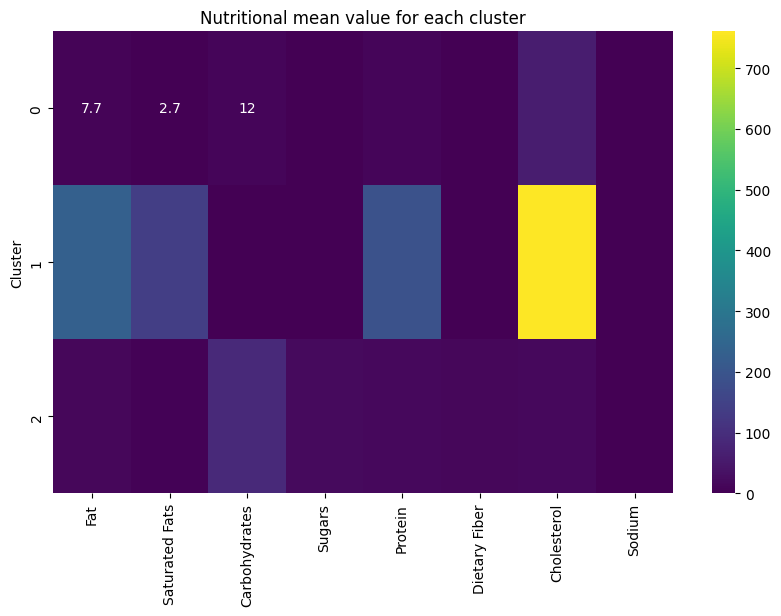

In [13]:
# visualize means of each nutritional feature in clusters
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title('Nutritional mean value for each cluster')
plt.show()